In [91]:
import tensorflow

In [92]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import numpy as np

In [93]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()

In [94]:
X_train.shape

(60000, 28, 28)

In [95]:
X_test.shape

(10000, 28, 28)

In [96]:
Y_train.shape

(60000,)

In [97]:
Y_test.shape

(10000,)

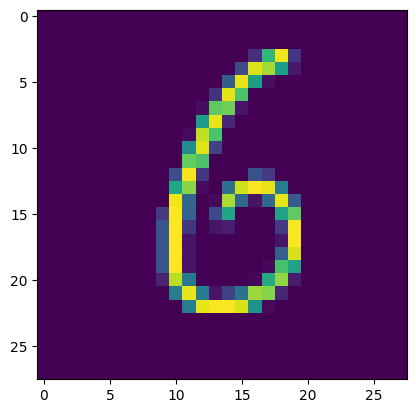

In [98]:
import matplotlib.pyplot as plt
plt.imshow(X_train[18])

In [99]:
Y_train[18]

6

In [100]:
X_train=X_train/255
X_test=X_test/255

In [101]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [102]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [103]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               100480    
                                                                 
 dense_12 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [104]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [105]:
history = model.fit(X_train,Y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.2887 - accuracy: 0.9170 - val_loss: 0.1589 - val_accuracy: 0.9555
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1316 - accuracy: 0.9615 - val_loss: 0.1237 - val_accuracy: 0.9639
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0910 - accuracy: 0.9729 - val_loss: 0.1040 - val_accuracy: 0.9701
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0682 - accuracy: 0.9790 - val_loss: 0.0949 - val_accuracy: 0.9722
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0524 - accuracy: 0.9842 - val_loss: 0.0925 - val_accuracy: 0.9739
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0409 - accuracy: 0.9868 - val_loss: 0.0947 - val_accuracy: 0.9741
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0321 - accuracy: 0.9902 - val_loss: 0.0884 - val_accuracy:

In [106]:
Y_prob=model.predict(X_test)


313/313 [==============================] - 1s 1ms/step


In [107]:
y_pred=Y_prob.argmax(axis=1)

In [108]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9772

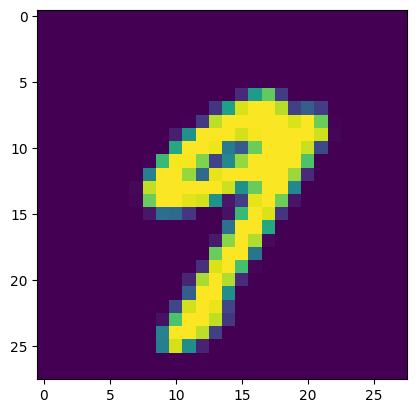

In [111]:
plt.imshow(X_test[20])

In [112]:
model.predict(X_test[20].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 20ms/step


array([9])

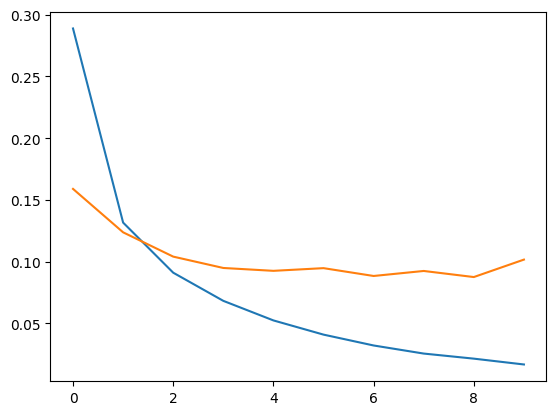

In [114]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

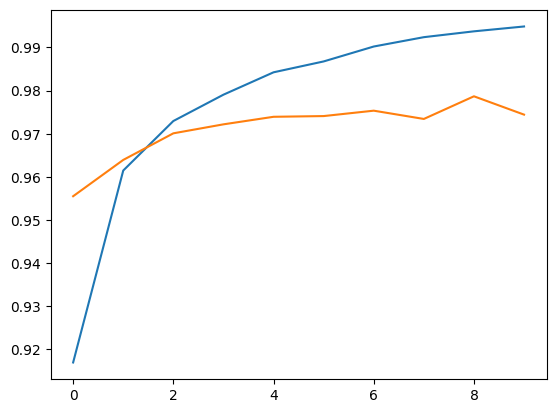

In [115]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])